# Cheatsheet Notebook

In [59]:
import cv2
import numpy as np
import colour
from scipy import signal

## Farbsysteme

Informationen und Umrechnung der Verschiedenen Farbsysteme

- Additiv: https://lehrerfortbildung-bw.de/st_digital/medienkompetenz/gestaltung-farbe/physik/additiv/addinter/index.html
- Subtraktiv: https://lehrerfortbildung-bw.de/st_digital/medienkompetenz/gestaltung-farbe/physik/subtrakt/subinter/

In [11]:
# https://colour.readthedocs.io/

# CIE xy -> xyz
def xyz_from_xy(x, y):
    """Return the vector (x, y, 1-x-y)."""
    return np.array((x, y, 1-x-y))

In [12]:
colour.XYZ_to_xy(xyz_from_xy(3.0, 3.0))

array([ 3.,  3.])

In [31]:
colour.XYZ_to_xy(colour.wavelength_to_XYZ(550))

array([ 0.3016038 ,  0.69230776])

In [19]:
colour.RGB_to_HSV((1, 1, 0))

array([ 0.16666667,  1.        ,  1.        ])

In [20]:
colour.RGB_to_CMY((1, 1, 0))

array([ 0.,  0.,  1.])

In [23]:
colour.CMY_to_CMYK(colour.RGB_to_CMY((1, 1, 0)))

array([ 0.,  0.,  1.,  0.])

In [26]:
colour.HSV_to_RGB((240, 0, 0.5))

array([ 0.5,  0.5,  0.5])

In [28]:
colour.RGB_to_CMY(colour.HSV_to_RGB((240, 0, 0.5)))

array([ 0.5,  0.5,  0.5])

## Histogramme

Berechnen und Histogramausgleich

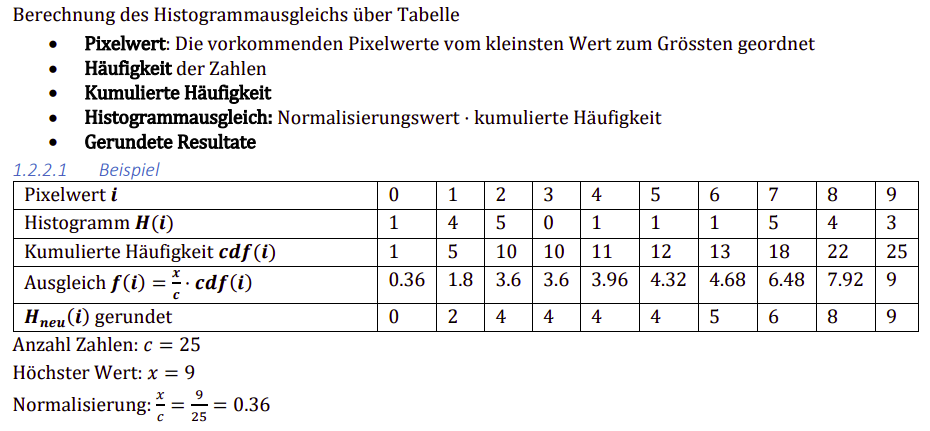

In [41]:
cv2.equalizeHist(np.uint8([
    [0, 1, 1, 2, 2],
    [2, 1, 1, 2, 2],
    [4, 5, 6, 7, 7],
    [8, 8, 7, 7, 7],
    [8, 8, 9, 9, 9]
]))

array([[  0,  42,  42,  96,  96],
       [ 96,  42,  42,  96,  96],
       [106, 117, 128, 181, 181],
       [223, 223, 181, 181, 181],
       [223, 223, 255, 255, 255]], dtype=uint8)

## Faltungen

Faltungen von hand und mit numpy berechnen

Beispiel:

- f: (0, 0, 0, 1, 1, 0, 0, 0)
- w: (1, 2, 2, 2, 1)

![faltung](img/faltung.png)

In [48]:
# faltung von f * w

f = np.array([0, 0, 0, 1, 1, 1, 0, 0, 0])
w = np.array([1, 2, 2, 2, 1])

np.convolve(f, w)

array([0, 0, 0, 1, 3, 5, 6, 5, 3, 1, 0, 0, 0])

In [51]:
# korrelation von g ox h

g = np.array([1, 1, 0, 0, 1, 1, 0, 0])
h = np.array([0, 1, 1, 0])

np.correlate(g, h, "full")

array([0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0])

In [52]:
# man beachte
np.correlate(g, h, "full") == np.convolve(g, h)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [61]:
# 2d example
f = np.array([
    [1, 2, 3],
    [0, 1, 2],
    [4, 3, 1]
])
w = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

signal.convolve2d(f, w)

array([[ 1,  4,  8,  8,  3],
       [ 2,  9, 20, 21,  8],
       [ 5, 17, 27, 23,  8],
       [ 8, 23, 26, 15,  4],
       [ 4, 11, 11,  5,  1]])

In [70]:
# 2d example with cv2.filter2D
image = np.uint8(np.array([
    [1, 2, 3],
    [0, 1, 2],
    [4, 3, 1]
]))

prewitt_operator = np.array([
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1]
])


prewitt_img = cv2.filter2D(image, -1, prewitt_operator)
prewitt_img

array([[0, 8, 0],
       [0, 3, 0],
       [0, 0, 0]], dtype=uint8)

In [71]:
image = np.uint8(np.array([
    [1, 2, 3],
    [0, 1, 2],
    [4, 3, 1]
]))

sobel_operator = np.array([
    [-1, -2, -1], 
    [0, 0, 0], 
])

sobel_img = cv2.filter2D(image, -1, sobel_operator)
sobel_img

array([[0, 0, 0],
       [8, 3, 0],
       [0, 0, 0]], dtype=uint8)

In [72]:
image = np.uint8(np.array([
    [1, 2, 3],
    [0, 1, 2],
    [4, 3, 1]
]))

laplace_operator = np.array([
    [0, -1, 0], 
    [-1, 4, -1], 
    [0, -1, 0]
])

laplace_img = cv2.filter2D(image, -1, sobel_operator)
laplace_img

array([[0, 0, 0],
       [8, 3, 0],
       [0, 0, 0]], dtype=uint8)

## Canny Edge detection

- Apply Gaussian filter to smooth the image in order to remove the noise
- Find the intensity gradients of the image (sobel, prewit)
- Apply non-maximum suppression to get rid of spurious response to edge detection (find max edge)
- Apply double threshold to determine potential edges (make edge 1px)
- Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

## Hough Transformation

http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/HoughTrans_lines_09.pdf

## Huffman Encoding

https://csfieldguide.org.nz/en/interactives/huffman-tree/

## Lloyds Algorithmus (k-Means)

- Initalisiere Cluster Zentren (z.Bsp. zufällig)

1. Berechne die Zugehörigkeit der Punkte zu den Clustern
2. Berechne die Mittelpunkte der Cluster als neue Zentren

- Iteriere bis sich keine Cluster Zugehörigkeit mehr ändert

k-Means meint die anzahl cluster

In [74]:
from dahuffman import HuffmanCodec

codec = HuffmanCodec.from_data('hello world how are you doing today foo bar lorem ipsum')
codec.encode('do lo er ad od')

b'^O\x1a\xc4S\xab'

In [75]:
codec.print_code_table()

Bits Code   Value Symbol
   2 00         0 ' '
   4 0100       4 'a'
   4 0101       5 'd'
   4 0110       6 'e'
   6 011100    28 _EOF
   6 011101    29 'b'
   6 011110    30 'f'
   6 011111    31 'g'
   5 10000     16 'h'
   5 10001     17 'i'
   4 1001       9 'l'
   5 10100     20 'm'
   6 101010    42 'n'
   6 101011    43 'p'
   4 1011      11 'r'
   6 110000    48 's'
   6 110001    49 't'
   5 11001     25 'u'
   5 11010     26 'w'
   5 11011     27 'y'
   3 111        7 'o'
